In [2]:
#To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports 
import numpy as np

#print(np.__version__) #print numpy version, e.g., 1.21.5
#to upgrade: pip install --upgrade numpy

import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [3]:
import pandas as pd
data = pd.read_csv("MergeConflictsDataset.csv", sep=';')
data.head()

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
0,efc0bcd1d6199448c323549fdc45310750b48c85,fb9f2a65cabba5a924b89a45793914066471b2ab,5ee7c7c750e9ecffaea12f97d5b05b2445e7c007,fb9f2a65cabba5a924b89a45793914066471b2ab,1,5,0,0,1,23,...,0,0,0,0,0,20,65,35.40000,20.0,0
1,287b9b838b6b6b212ef538aa537aef76110ee111,72fd7d81c9c7e28af8740f5a1b210a803290383d,fb9f2a65cabba5a924b89a45793914066471b2ab,a18c1088c892f1e6ed4b7d541e68b2e4b039a42e,0,1166,11267,1,2,371,...,0,0,0,0,0,31,117,58.56383,53.5,1
2,e7478680c0db825239ea9628967728c8577bb5c2,36977963caa2896ad9a4a92b2bdcd85189beccb1,bc230857adc3a9763bc7d89793d826463c857c00,36977963caa2896ad9a4a92b2bdcd85189beccb1,1,0,0,0,1,22,...,0,0,0,0,0,18,18,18.00000,18.0,0
3,0c65b30a8fd3a7db40163fcb9b0004cb7487c0ff,419e6d2d9fb91f2d9cdbdd1161a6c7ecc329363f,877c43f8242b88447d0234400c6e9b5c7586b558,fe29962932a8e34f0c3ac5cd795cd40090c9fabd,1,0,0,2,1,24,...,0,0,0,0,0,22,63,38.80000,31.0,0
4,419e6d2d9fb91f2d9cdbdd1161a6c7ecc329363f,7899f565d3461ed287e61662c8d399aafcac9e42,5e68e04e310c4f57a19d4cfa6be1e0ba3a8801d6,236b85af833398e0f07d08b7d7a25734d8c1b11d,0,0,0,1,2,2,...,0,0,0,0,0,31,56,43.50000,43.5,1


In [3]:
print(data.isnull().sum())

commit             0
parent1            0
parent2            0
ancestor           1
is pr              0
added lines        0
deleted lines      0
devs parent1       0
devs parent2       0
time               0
nr files           0
added files        0
deleted files      0
renamed files      0
copied files       0
modified files     0
nr commits1        0
nr commits2        0
density1           0
density2           0
fix                0
bug                0
feature            0
improve            0
document           0
refactor           0
update             0
add                0
remove             0
use                0
delete             0
change             0
messages_min       0
messages_max       0
messages_mean      0
messages_median    0
conflict           0
dtype: int64


In [4]:
df= data.dropna(subset=["ancestor"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26972 entries, 0 to 26972
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   commit           26972 non-null  object 
 1   parent1          26972 non-null  object 
 2   parent2          26972 non-null  object 
 3   ancestor         26972 non-null  object 
 4   is pr            26972 non-null  int64  
 5   added lines      26972 non-null  int64  
 6   deleted lines    26972 non-null  int64  
 7   devs parent1     26972 non-null  int64  
 8   devs parent2     26972 non-null  int64  
 9   time             26972 non-null  int64  
 10  nr files         26972 non-null  int64  
 11  added files      26972 non-null  int64  
 12  deleted files    26972 non-null  int64  
 13  renamed files    26972 non-null  int64  
 14  copied files     26972 non-null  int64  
 15  modified files   26972 non-null  int64  
 16  nr commits1      26972 non-null  int64  
 17  nr commits2 

In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df = data.apply(label_encoder.fit_transform)
df

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
0,25206,25994,9899,18212,1,5,0,0,1,23,...,0,0,0,0,0,20,64,451,33,0
1,4283,11968,26283,11668,0,970,1111,1,2,371,...,0,0,0,0,0,31,116,1732,100,1
2,24358,5698,19606,3951,1,0,0,0,1,22,...,0,0,0,0,0,18,17,71,29,0
3,1270,6896,14036,18400,1,0,0,2,1,24,...,0,0,0,0,0,22,62,582,55,0
4,7008,12515,9845,2600,0,0,0,1,2,2,...,0,0,0,0,0,31,55,770,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26968,20769,9780,22531,6834,1,66,0,0,1,184,...,0,0,0,0,0,19,18,77,31,0
26969,14869,16788,7494,17026,1,1,1,2,1,736,...,0,0,0,0,0,30,33,384,61,0
26970,17164,8839,23185,6131,1,1,1,0,1,22,...,0,0,0,0,0,8,57,378,59,0
26971,23388,8839,24104,6131,1,1,1,0,1,11,...,0,0,0,0,0,8,7,13,9,0


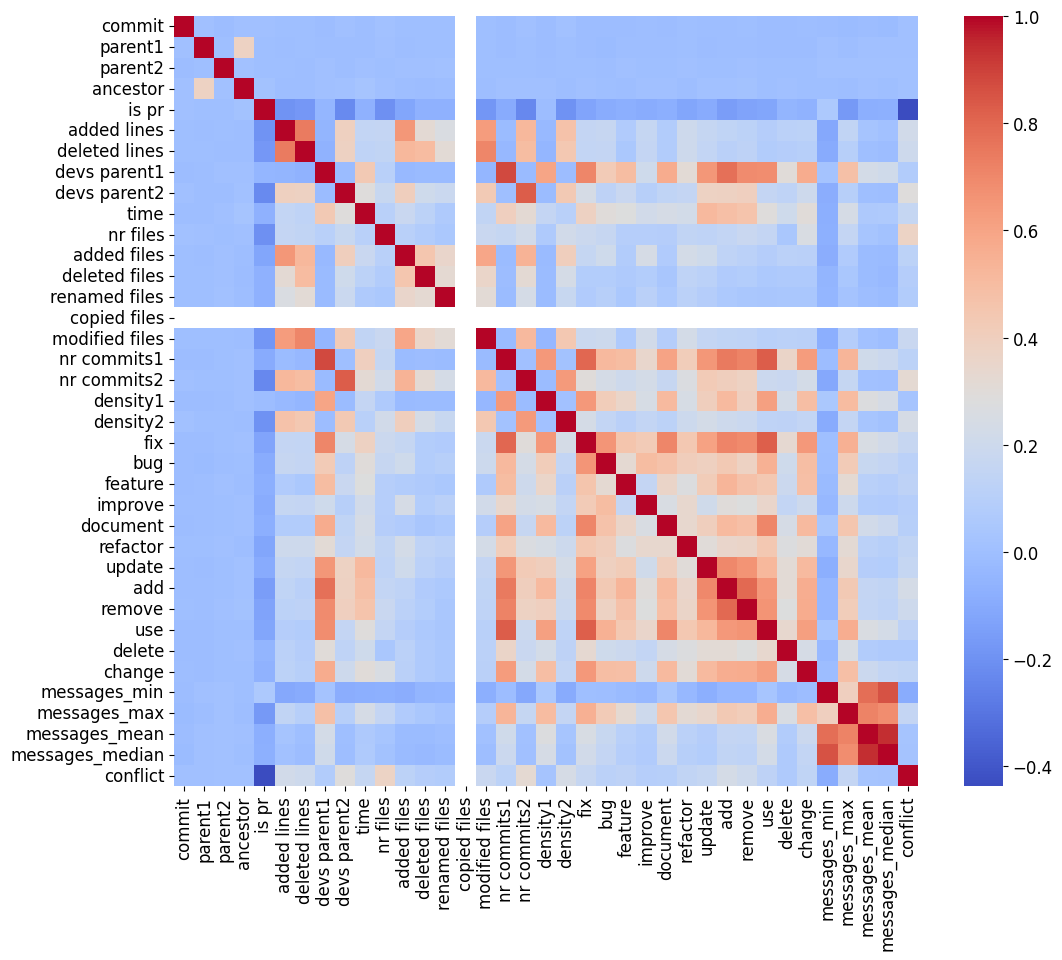

In [6]:
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()

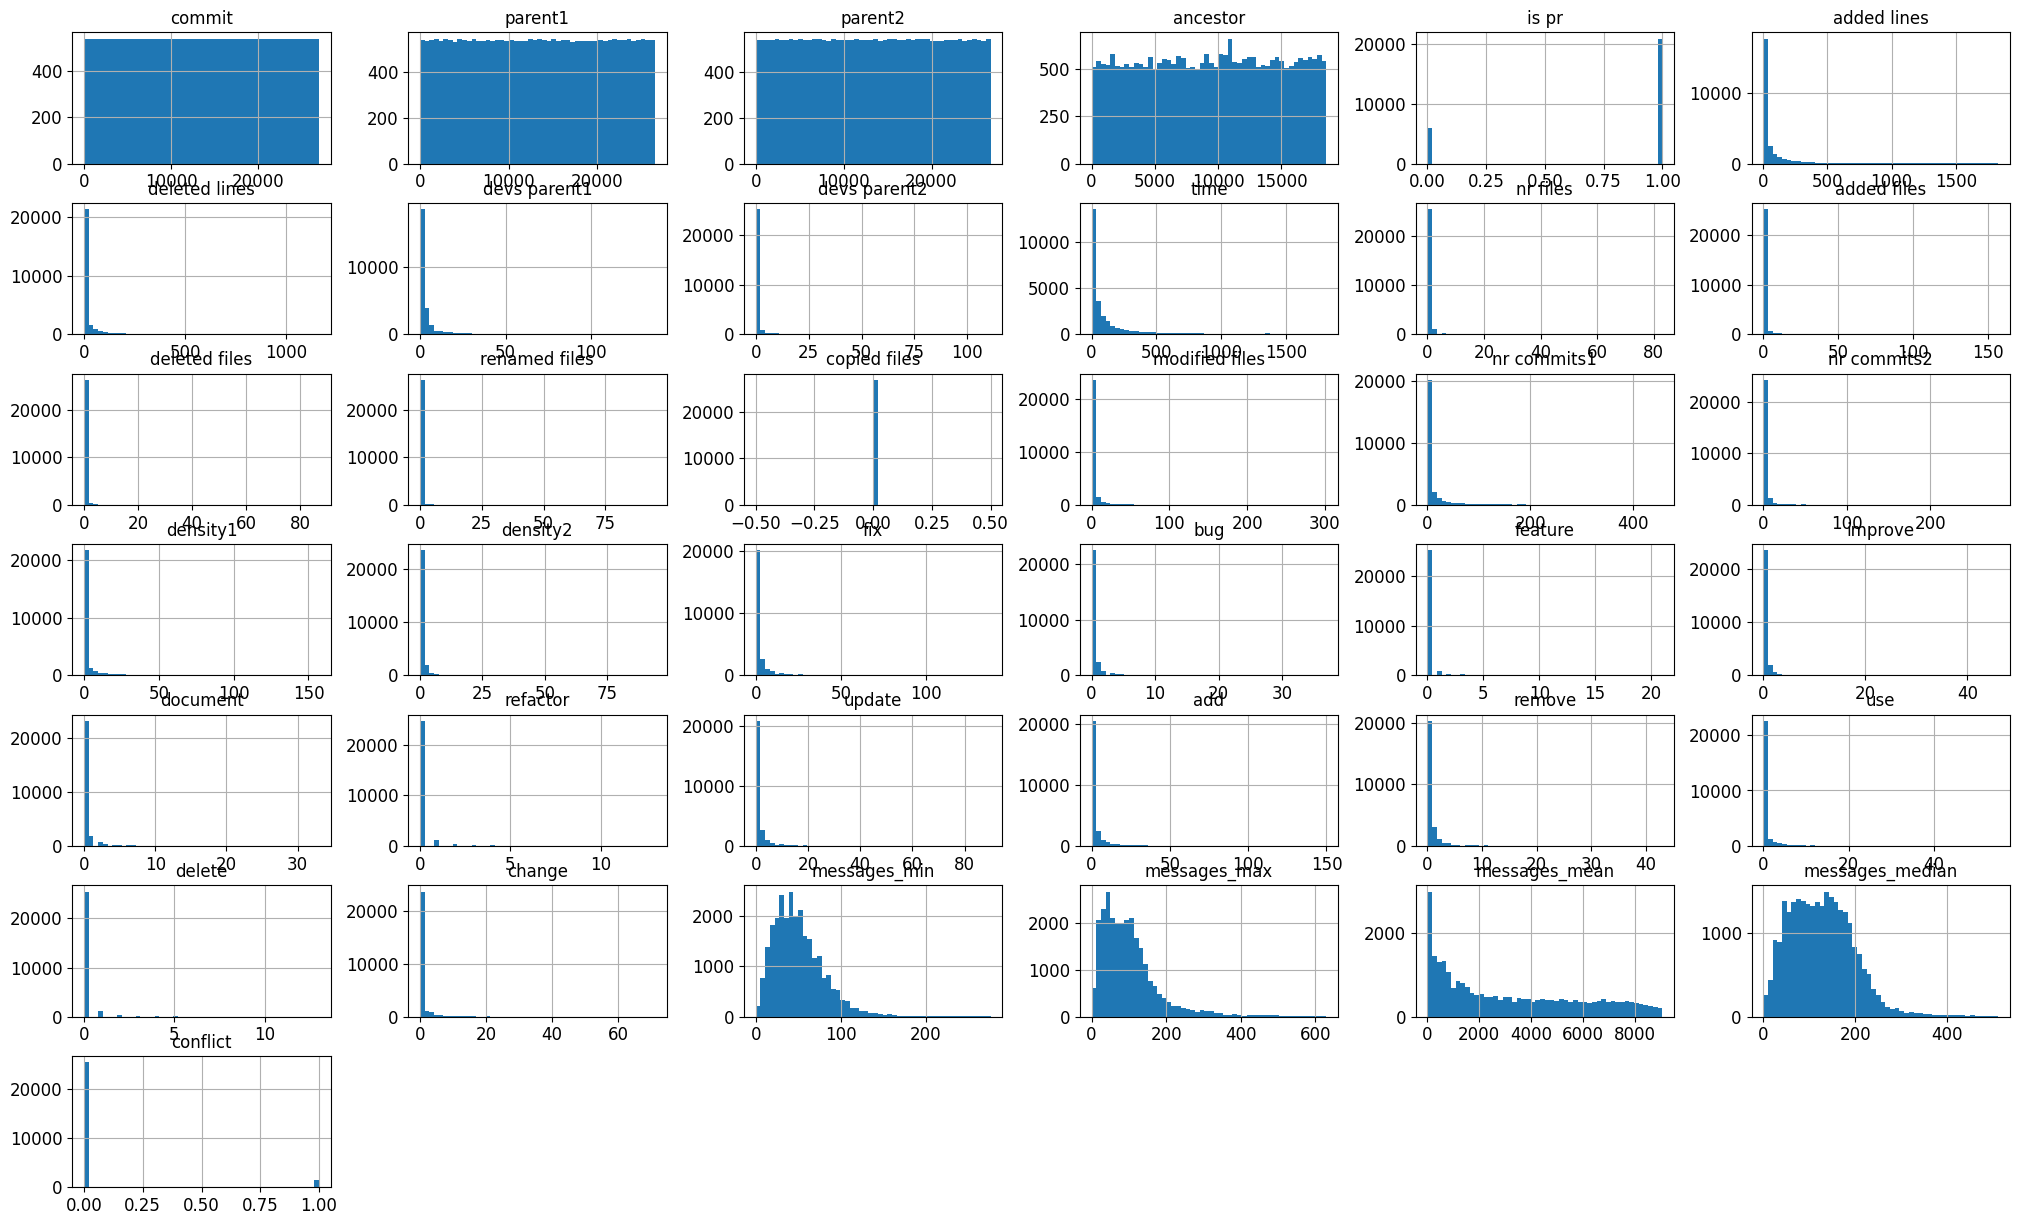

In [7]:
%matplotlib inline
df.hist(bins=50,figsize=(25,15)) 
plt.show()

In [21]:
# Define features and target
X = df.drop(columns=['conflict'])
y = df['conflict']


In [9]:
from sklearn.model_selection import train_test_split
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#print(len(X_train), "train +", len(y_test), "test")

In [14]:
from sklearn.preprocessing import StandardScaler
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

 # Decision Trees


In [19]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# train the classifier on the training data
clf.fit(X_train, y_train)

# make predictions on the test data
y_pred_dt= clf.predict(X_test)

# evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Accuracy: 0.9573679332715477

Confusion Matrix:
 [[4977  113]
 [ 117  188]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      5090
           1       0.62      0.62      0.62       305

    accuracy                           0.96      5395
   macro avg       0.80      0.80      0.80      5395
weighted avg       0.96      0.96      0.96      5395



In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

#  hyperparameters to optimize
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='precision')

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Output the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Get the best estimator
best_tree = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_tree.predict(X_test)

# Evaluate the best decision tree classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best parameters found:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy: 0.9620018535681186

Confusion Matrix:
 [[4999   91]
 [ 114  191]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      5090
           1       0.68      0.63      0.65       305

    accuracy                           0.96      5395
   macro avg       0.83      0.80      0.82      5395
weighted avg       0.96      0.96      0.96      5395



# Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.9634847080630213

Confusion Matrix:
 [[5039   51]
 [ 146  159]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      5090
           1       0.76      0.52      0.62       305

    accuracy                           0.96      5395
   macro avg       0.86      0.76      0.80      5395
weighted avg       0.96      0.96      0.96      5395



In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

param_grid = {
    'n_estimators': [10, 30, 50],  
    'max_features': ['sqrt'],  
    'max_depth': [None, 10],  
    'min_samples_split': [2, 5], 
    'min_samples_leaf': [1, 2],  
    'bootstrap': [True]  
}

# Initialize GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='precision')

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)

# Get the best estimator
best_forest = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred_rf_gs = best_forest.predict(X_test)

# Evaluate the best RandomForest classifier
print("Accuracy:", accuracy_score(y_test, y_pred_rf_gs))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_gs))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_gs))

Best parameters found:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy: 0.9640407784986098

Confusion Matrix:
 [[5050   40]
 [ 154  151]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      5090
           1       0.79      0.50      0.61       305

    accuracy                           0.96      5395
   macro avg       0.88      0.74      0.80      5395
weighted avg       0.96      0.96      0.96      5395



In [26]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


svm = SVC(kernel="linear")

# Training the SVM
svm.fit(X_train, y_train)

# Making predictions
y_pred_svm= svm.predict(X_test)

# Evaluating the model
print("Accuracy Score:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

Accuracy Score: 0.9573679332715477

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      5090
           1       0.78      0.34      0.47       305

    accuracy                           0.96      5395
   macro avg       0.87      0.67      0.73      5395
weighted avg       0.95      0.96      0.95      5395

